In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [3]:
data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df.head()

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# y_cols_1 = list(data_df_full.columns[8:12])
# y_cols_2 = list(data_df_full.columns[68:72])

In [5]:
#y = data_df[y_cols_1+y_cols_2]

In [6]:
X = data_df['x']
y = data_df[y_cols]

In [7]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y',]


Y = len(y_cols)
#Y = 8
print(f'L={L}, Y={Y}')

L=201, Y=64


In [9]:
# instantiate gpmap object
gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
                                              alphabet=alphabet,
                                              number_latent_nodes=2)



In [10]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [11]:
print(N_y)

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
TiteSeq_02_bin1     5094914
                     ...   
TiteSeq_15_bin4      621457
TiteSeq_16_bin1    23064475
TiteSeq_16_bin2     1582135
TiteSeq_16_bin3     3128968
TiteSeq_16_bin4      725998
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [12]:
bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,250000]]))
#bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,200000]]))

bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0.000000,5.192957
1,5.192957,7.244228
2,7.244228,9.259131
3,9.259131,12.429216


I don't know how to obtain these values. I based them roughly on Figure 2 from Star et al

In [13]:
mu_neg = np.log(50)
mu_pos = np.log(70000)

# log10 variances
# sigma_neg = 1/3.
# sigma_pos = 1/3.

sigma_neg = 0.5
sigma_pos = 0.5

# mu_neg = 10.
# mu_pos = 3.

sigma_neg = 2.0
sigma_pos = 2.0



In [14]:
mu_pos, mu_neg

(11.156250521031495, 3.912023005428146)

In [15]:
np.log(50), np.log(70000)

(3.912023005428146, 11.156250521031495)

In [16]:
f_y_upper_bounds

array([ 5.19295685,  7.24422752,  9.25913054, 12.4292162 ])

In [17]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

#cs = [0,10**(-6)]

#cs = np.arange(0.1,1,0.06)

In [18]:
N_y[0:4]

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
dtype: int64

In [19]:
mp_list = [mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4*mp_idx:4*mp_idx+4],
                                                         c=cs[mp_idx]+10**(-15),
                                                         Y=4,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,)
           for mp_idx in range(len(y_cols)//4)
          ]

In [20]:
#mp_list

In [21]:
# TiteSeq_mp_1 = mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[0:4],
#                                                          c=0,
#                                                          Y=4,
#                                                          mu_pos=mu_pos,
#                                                          sigma_pos=sigma_pos,
#                                                          mu_neg=mu_neg,
#                                                          sigma_neg=sigma_neg,
#                                                          f_y_lower_bounds=f_y_lower_bounds,
#                                                          f_y_upper_bounds=f_y_upper_bounds,
#                                                          info_for_layers_dict={'H_y_norm':0},
#                                                          eta=1e-5,
#                                                          )

# TiteSeq_mp_2 = mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4:8],
#                                                          c=10**(-6),
#                                                          Y=4,
#                                                          mu_pos=mu_pos,
#                                                          sigma_pos=sigma_pos,
#                                                          mu_neg=mu_neg,
#                                                          sigma_neg=sigma_neg,
#                                                          f_y_lower_bounds=f_y_lower_bounds,
#                                                          f_y_upper_bounds=f_y_upper_bounds,
#                                                          info_for_layers_dict={'H_y_norm':0},
#                                                          eta=1e-5,
#                                                          )

In [22]:
# model = mavenn.Model2(gpmap=gpmap,
#                       mp_list=mp_list)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

2022-06-05 22:35:14.503801: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 multi__additive_gp_map_layer (  (None, 2)           8042        ['Sequence_only[0][0]']          
 Multi_AdditiveGPMapLayer)                                                                        
                                                                                              

In [24]:
#y_train[y_cols_2]

In [25]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[0:4]].values,
                       y_train[y_cols[4:8]].values,
                       y_train[y_cols[8:12]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[52:56]].values,                   
                       y_train[y_cols[56:60]].values,                                      
                       y_train[y_cols[60:64]].values,                                                         
                      ],

               shuffle=True)

N = 165,825 observations set as training data.
Using 19.9% for validation.
Data shuffled.
Time to set data: 33.7 sec.


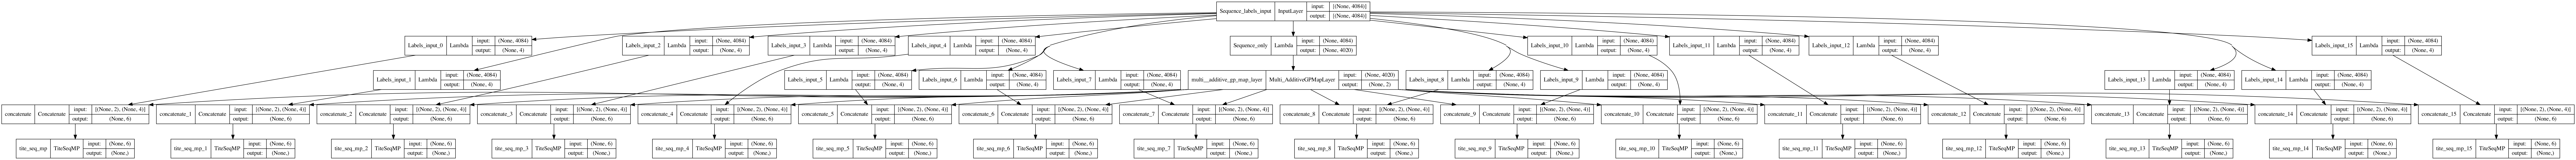

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='titeseq_mp_16_heads.png')

In [27]:

# Fit model to data
model.fit(learning_rate=.0005,
          epochs=40,
          batch_size=250,
          try_tqdm = False,
          early_stopping=False,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/40
532/532 [==============================] - 26s 29ms/step - loss: 3318744.0000 - tite_seq_mp_loss: 349408.5000 - tite_seq_mp_1_loss: 338325.9062 - tite_seq_mp_2_loss: 346461.3438 - tite_seq_mp_3_loss: 412627.9688 - tite_seq_mp_4_loss: 359775.2812 - tite_seq_mp_5_loss: 354889.3125 - tite_seq_mp_6_loss: 381237.0000 - tite_seq_mp_7_loss: 239381.2500 - tite_seq_mp_8_loss: 152997.2031 - tite_seq_mp_9_loss: 74098.1484 - tite_seq_mp_10_loss: 59234.8828 - tite_seq_mp_11_loss: 87659.0391 - tite_seq_mp_12_loss: 49676.5273 - tite_seq_mp_13_loss: 32860.2734 - tite_seq_mp_14_loss: 34294.5977 - tite_seq_mp_15_loss: 45817.2031 - I_var: -0.7171 - val_loss: 3133533.7500 - val_tite_seq_mp_loss: 362332.8438 - val_tite_seq_mp_1_loss: 338333.0938 - val_tite_seq_mp_2_loss: 346175.6562 - val_tite_seq_mp_3_loss: 405218.0625 - val_tite_seq_mp_4_loss: 352525.8125 - val_tite_seq_mp_5_loss: 351338.4688 - val_tite_seq_mp_6_loss: 368769.7500 - val_tite_seq_mp_7_loss: 214868.5938 - val_tite_seq_mp_8_loss: 

532/532 [==============================] - 8s 14ms/step - loss: 3117848.5000 - tite_seq_mp_loss: 356455.3750 - tite_seq_mp_1_loss: 342871.0000 - tite_seq_mp_2_loss: 351140.2812 - tite_seq_mp_3_loss: 414380.6875 - tite_seq_mp_4_loss: 361640.7812 - tite_seq_mp_5_loss: 350203.3750 - tite_seq_mp_6_loss: 342663.1250 - tite_seq_mp_7_loss: 194276.2969 - tite_seq_mp_8_loss: 99081.5547 - tite_seq_mp_9_loss: 39291.3633 - tite_seq_mp_10_loss: 43414.7031 - tite_seq_mp_11_loss: 61736.8633 - tite_seq_mp_12_loss: 43989.3555 - tite_seq_mp_13_loss: 33811.0078 - tite_seq_mp_14_loss: 37112.2617 - tite_seq_mp_15_loss: 45779.9570 - I_var: -0.7275 - val_loss: 3066119.0000 - val_tite_seq_mp_loss: 350065.9375 - val_tite_seq_mp_1_loss: 334513.5000 - val_tite_seq_mp_2_loss: 345028.3750 - val_tite_seq_mp_3_loss: 405160.8125 - val_tite_seq_mp_4_loss: 353151.6250 - val_tite_seq_mp_5_loss: 346133.0000 - val_tite_seq_mp_6_loss: 338866.0000 - val_tite_seq_mp_7_loss: 193873.9688 - val_tite_seq_mp_8_loss: 98833.7188 - 

532/532 [==============================] - 10s 20ms/step - loss: 3107170.0000 - tite_seq_mp_loss: 363469.1562 - tite_seq_mp_1_loss: 342151.4375 - tite_seq_mp_2_loss: 352669.9375 - tite_seq_mp_3_loss: 412424.3125 - tite_seq_mp_4_loss: 357839.5625 - tite_seq_mp_5_loss: 345383.4062 - tite_seq_mp_6_loss: 336066.8750 - tite_seq_mp_7_loss: 188330.6406 - tite_seq_mp_8_loss: 93458.9609 - tite_seq_mp_9_loss: 36415.6250 - tite_seq_mp_10_loss: 41806.2383 - tite_seq_mp_11_loss: 61898.3594 - tite_seq_mp_12_loss: 46872.4727 - tite_seq_mp_13_loss: 37056.9727 - tite_seq_mp_14_loss: 40775.2266 - tite_seq_mp_15_loss: 50549.8438 - I_var: -0.9100 - val_loss: 3062589.2500 - val_tite_seq_mp_loss: 358477.5000 - val_tite_seq_mp_1_loss: 335012.5938 - val_tite_seq_mp_2_loss: 345509.2188 - val_tite_seq_mp_3_loss: 405931.9375 - val_tite_seq_mp_4_loss: 349573.6562 - val_tite_seq_mp_5_loss: 337608.9688 - val_tite_seq_mp_6_loss: 326806.3750 - val_tite_seq_mp_7_loss: 182661.9844 - val_tite_seq_mp_8_loss: 88768.7656 -

532/532 [==============================] - 7s 13ms/step - loss: 3103910.2500 - tite_seq_mp_loss: 364951.3750 - tite_seq_mp_1_loss: 341490.7812 - tite_seq_mp_2_loss: 351745.3125 - tite_seq_mp_3_loss: 413695.1562 - tite_seq_mp_4_loss: 359010.7188 - tite_seq_mp_5_loss: 343784.6875 - tite_seq_mp_6_loss: 332014.3438 - tite_seq_mp_7_loss: 184740.6406 - tite_seq_mp_8_loss: 90050.0859 - tite_seq_mp_9_loss: 34824.2461 - tite_seq_mp_10_loss: 40921.1836 - tite_seq_mp_11_loss: 62231.2930 - tite_seq_mp_12_loss: 48760.9180 - tite_seq_mp_13_loss: 39133.3516 - tite_seq_mp_14_loss: 43065.4219 - tite_seq_mp_15_loss: 53488.1367 - I_var: -1.0156 - val_loss: 3064452.5000 - val_tite_seq_mp_loss: 354733.2188 - val_tite_seq_mp_1_loss: 335329.0938 - val_tite_seq_mp_2_loss: 345857.5625 - val_tite_seq_mp_3_loss: 405188.2500 - val_tite_seq_mp_4_loss: 351072.4375 - val_tite_seq_mp_5_loss: 344936.3750 - val_tite_seq_mp_6_loss: 338917.5625 - val_tite_seq_mp_7_loss: 193685.3750 - val_tite_seq_mp_8_loss: 98319.8203 - 

532/532 [==============================] - 8s 15ms/step - loss: 3099803.5000 - tite_seq_mp_loss: 364629.0938 - tite_seq_mp_1_loss: 341893.8125 - tite_seq_mp_2_loss: 351182.1562 - tite_seq_mp_3_loss: 413627.9375 - tite_seq_mp_4_loss: 359503.1250 - tite_seq_mp_5_loss: 341494.8125 - tite_seq_mp_6_loss: 329090.1562 - tite_seq_mp_7_loss: 182032.6562 - tite_seq_mp_8_loss: 87835.6641 - tite_seq_mp_9_loss: 33741.1641 - tite_seq_mp_10_loss: 40285.0234 - tite_seq_mp_11_loss: 62651.5469 - tite_seq_mp_12_loss: 50288.7227 - tite_seq_mp_13_loss: 40766.4766 - tite_seq_mp_14_loss: 44916.6211 - tite_seq_mp_15_loss: 55865.5664 - I_var: -1.1095 - val_loss: 3065488.2500 - val_tite_seq_mp_loss: 359841.5312 - val_tite_seq_mp_1_loss: 337392.6562 - val_tite_seq_mp_2_loss: 345931.5312 - val_tite_seq_mp_3_loss: 406028.4062 - val_tite_seq_mp_4_loss: 349869.3125 - val_tite_seq_mp_5_loss: 327418.1875 - val_tite_seq_mp_6_loss: 312503.0938 - val_tite_seq_mp_7_loss: 169124.6719 - val_tite_seq_mp_8_loss: 78048.4844 - 

532/532 [==============================] - 7s 13ms/step - loss: 3097312.0000 - tite_seq_mp_loss: 365073.1562 - tite_seq_mp_1_loss: 343196.0625 - tite_seq_mp_2_loss: 350827.9062 - tite_seq_mp_3_loss: 413418.4688 - tite_seq_mp_4_loss: 358260.1562 - tite_seq_mp_5_loss: 339766.5312 - tite_seq_mp_6_loss: 326749.9688 - tite_seq_mp_7_loss: 180053.2188 - tite_seq_mp_8_loss: 86095.9375 - tite_seq_mp_9_loss: 32986.1133 - tite_seq_mp_10_loss: 39927.7930 - tite_seq_mp_11_loss: 63010.6094 - tite_seq_mp_12_loss: 51556.8203 - tite_seq_mp_13_loss: 42094.7617 - tite_seq_mp_14_loss: 46439.5859 - tite_seq_mp_15_loss: 57851.2227 - I_var: -1.1872 - val_loss: 3057468.7500 - val_tite_seq_mp_loss: 357572.1250 - val_tite_seq_mp_1_loss: 336447.6875 - val_tite_seq_mp_2_loss: 345433.0312 - val_tite_seq_mp_3_loss: 405839.3750 - val_tite_seq_mp_4_loss: 350534.7500 - val_tite_seq_mp_5_loss: 328535.7500 - val_tite_seq_mp_6_loss: 314854.4375 - val_tite_seq_mp_7_loss: 171479.1875 - val_tite_seq_mp_8_loss: 79705.6562 - 

532/532 [==============================] - 8s 15ms/step - loss: 3094601.0000 - tite_seq_mp_loss: 364743.9062 - tite_seq_mp_1_loss: 342453.4062 - tite_seq_mp_2_loss: 350458.4375 - tite_seq_mp_3_loss: 413723.8438 - tite_seq_mp_4_loss: 358828.0312 - tite_seq_mp_5_loss: 337180.9688 - tite_seq_mp_6_loss: 325031.1875 - tite_seq_mp_7_loss: 178127.0312 - tite_seq_mp_8_loss: 84552.5859 - tite_seq_mp_9_loss: 32435.0156 - tite_seq_mp_10_loss: 39732.2461 - tite_seq_mp_11_loss: 63625.2031 - tite_seq_mp_12_loss: 52816.4766 - tite_seq_mp_13_loss: 43398.5586 - tite_seq_mp_14_loss: 47835.2148 - tite_seq_mp_15_loss: 59659.0625 - I_var: -1.2478 - val_loss: 3053563.5000 - val_tite_seq_mp_loss: 357934.1562 - val_tite_seq_mp_1_loss: 336771.1250 - val_tite_seq_mp_2_loss: 344864.8750 - val_tite_seq_mp_3_loss: 405008.4375 - val_tite_seq_mp_4_loss: 349685.0312 - val_tite_seq_mp_5_loss: 333462.7188 - val_tite_seq_mp_6_loss: 321897.1562 - val_tite_seq_mp_7_loss: 178414.7188 - val_tite_seq_mp_8_loss: 85075.3125 - 

On test data:


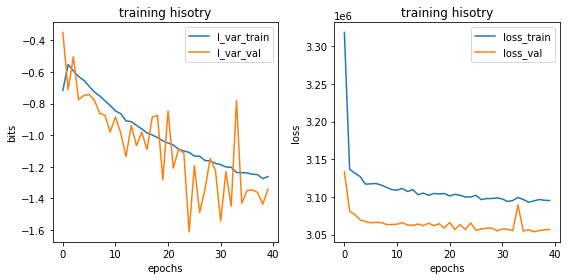

In [28]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [29]:
model.history['loss'][-1]/1e6

3.0952025

In [30]:
#phi = gpmap.x_to_phi(x_test)
gpmap.weights[1].numpy().shape

(1, 2, 201, 20)

In [31]:
# Get G-P map parameters in matrix form
theta_0 = np.squeeze(gpmap.weights[1].numpy()[0][0])
theta_1 = np.squeeze(gpmap.weights[1].numpy()[0][1])

# # Create grid in phi space
# #phi_lim = [-5, 3]
# phi_lim = [-5, 3]
# phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# # Create array of allowable y values
# Y = 10    # Y = number of bins
# y_lim = [-.5, Y-.5]
# y_all = range(Y)

# # Compute matrix of p(y|phi) values
# #measurement_process = sortseq_mp.p_of_all_y_given_phi(phi).numpy()
# # measurement_process_2 = mp_mpa_2.p_of_all_y_given_phi(phi).numpy()
# # measurement_process_3 = mp_mpa_3.p_of_all_y_given_phi(phi).numpy()

# #measurement_process = np.hstack([measurement_process_1,measurement_process_2,measurement_process_3])

# # Create figure with two panels
# fig, axs = plt.subplots(2,1,figsize=[10,8])

# ax = axs[0]
# # Left panel: draw logo using logomaker
# logo_1 = logomaker.Logo(pd.DataFrame(theta_0,columns=model.alphabet), ax=ax,center_values=False, color_scheme='chemistry')
# ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
# ax.set_xlabel(r'position ($l$)')
# ax.set_title('Theta-0')

# ax = axs[1]
# logo_2 = logomaker.Logo(pd.DataFrame(theta_1,columns=model.alphabet), ax=ax,center_values=False, color_scheme='chemistry')
# ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
# ax.set_xlabel(r'position ($l$)')
# ax.set_title('Theta-1')


# # Right panel: draw measurement process as heatmap
# # ax = axs[1]
# # im = ax.imshow(np.sort(measurement_process,axis=0).T,
# #                cmap='Greens',
# #                extent=phi_lim+y_lim,
# #                vmin=0,
# #                origin='lower',
# #                interpolation='nearest',
# #                aspect="auto")
# # ax.set_yticks(y_all)
# # ax.set_ylabel('bin number (y)')
# # ax.set_xlabel('latent phenotype ($\phi$)')
# # ax.set_title('measurement process')
# # cb = plt.colorbar(im)
# # cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# # Fix up plot
# fig.tight_layout(w_pad=3)
# #fig.savefig('sortseq_g-p_map_mpa_visualization.png')
# plt.show()

In [32]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_avg'].values[0:20]

bloom_bind_df.head()


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.03,-0.09,0.03,0.00,-0.10,-0.04,-0.02,-0.07,-0.01,-0.05,-0.02,0.00,-0.03,0.01,-0.02,-0.03,0.06,-0.04,-0.16,-0.06
1,0.00,-0.09,-0.02,0.08,-0.22,-0.08,0.04,0.00,-0.05,0.00,0.00,0.00,0.06,-0.02,0.00,-0.04,-0.03,0.00,-0.03,-0.03
2,-0.01,-0.14,-0.01,-0.15,-0.15,-0.07,-0.07,-0.06,-0.01,-0.01,-0.02,-0.06,0.03,0.02,0.00,-0.08,0.00,-0.05,-0.21,-0.07
3,-0.03,-0.11,0.07,0.01,-0.22,-0.03,-0.02,-0.20,-0.03,-0.20,-0.05,0.00,-0.18,0.01,0.00,-0.06,-0.04,-0.07,-0.24,-0.09
4,0.04,-0.11,0.00,0.06,-0.03,-0.08,-0.03,-0.02,-0.03,0.00,0.01,0.03,0.06,-0.02,-0.01,0.01,0.02,-0.08,-0.05,-0.02


In [33]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_exp_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    temp_df['expr_lib1']
    bloom_exp_df.loc[site-1] = temp_df['expr_avg'].values[0:20]
    
bloom_exp_df.head()    

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.11,-1.26,-0.44,-0.31,-0.70,-0.25,-0.61,-0.85,-0.20,-0.75,-0.75,0.00,-0.21,-0.53,-0.44,-0.33,-0.34,-0.61,-1.12,-1.02
1,0.00,-0.12,0.03,0.01,-0.10,0.14,0.05,0.00,-0.06,-0.03,-0.02,0.05,-0.17,0.07,-0.04,-0.03,-0.04,0.02,-0.33,-0.07
2,-0.37,-0.93,-0.27,-0.31,-0.89,-0.41,-0.29,-1.03,-0.20,-0.55,-0.47,-0.35,-0.28,-0.35,-0.54,-0.04,0.00,-0.56,-0.63,-0.62
3,-0.12,-0.57,-0.04,-0.05,-0.97,-0.21,-0.12,-0.67,-0.02,-0.72,-0.40,0.00,-0.55,-0.08,-0.12,-0.19,-0.02,-0.47,-1.01,-0.61
4,-0.01,-0.38,-0.09,0.11,-0.16,-0.16,-0.10,-0.16,0.02,0.00,-0.15,-0.08,0.09,-0.05,-0.14,-0.08,-0.08,-0.10,-0.13,-0.12


In [34]:
theta_0_df = pd.DataFrame(theta_0,columns=alphabet)
theta_1_df = pd.DataFrame(theta_1,columns=alphabet)

In [35]:
# fig, axs = plt.subplots(1,1,figsize=[15,5])

# # Left panel: draw logo using logomaker
# ax = axs
# logo_bloomd = logomaker.Logo(bloom_bind_df.fillna(0), ax=ax,center_values=False, color_scheme='chemistry')
# ax.set_ylabel('Sinlge mut effects - Bloom')
# ax.set_xlabel(r'position ($l$)')
# ax.set_title('Bloom single mut effects - binding')
# ax.set_xticks(np.arange(0,201,5))
# ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
# plt.show()

In [36]:
from mavenn.src.error_handling import check
import numbers
from mavenn.src.utils import x_to_stats, validate_seqs, _x_to_mat

def get_theta(model,
              theta_0_uf,
              theta_lc_uf,
              gauge="consensus",
              p_lc=None,
              x_wt=None,
              unobserved_value=np.nan):
    """
    Return parameters of the G-P map.

    This function returns a ``dict`` containing the parameters of the
    model's G-P map. Keys are of type ``str``, values are of type
    ``np.ndarray`` . Relevant (key, value) pairs are:
    ``'theta_0'`` , constant term;
    ``'theta_lc'`` , additive effects in the form of a 2D array with shape
    ``(L,C)``;
    ``'theta_lclc'`` , pairwise effects in the form of a 4D array of shape
    ``(L,C,L,C)``;
    ``'theta_bb'`` , all parameters for ``gpmap_type='blackbox'`` models.

    Importantly this function gauge-fixes model parameters before
    returning them, i.e., it pins down non-identifiable degrees of freedom.
    Gauge fixing is performed using a hierarchical gauge, which maximizes the
    fraction of variance in ``phi`` explained by the lowest-order terms.
    Computing such variances requires assuming probability distribution
    over sequence space, however, and using different distributions will
    result in different ways of fixing the gauge.

    This function assumes that the distribution used to define the gauge
    factorizes across sequence positions, and can thus be represented by an
    ``L`` x ``C`` probability matrix ``p_lc`` that lists the probability of
    each character ``c`` at each position ``l``.

    An important special case is the wild-type gauge, in which ``p_lc``
    is the one-hot encoding of a "wild-type" specific sequence ``x_wt``.
    In this case, the constant parameter ``theta_0`` is the value of
    ``phi`` for ``x_wt``, additive parameters ``theta_lc`` represent the
    effect of single-point mutations away from ``x_wt``, and so on.

    Parameters
    ----------
    gauge: (str)
        String specification of which gauge to use. Allowed values are:
        ``'uniform'`` , hierarchical gauge using a uniform sequence
        distribution over the characters at each position observed in the
        training set (unobserved characters are assigned probability 0).
        ``'empirical'`` , hierarchical gauge using an empirical
        distribution computed from the training data;
        ``'consensus'`` , wild-type gauge using the training data
        consensus sequence;
        ``'user'`` , gauge using either ``p_lc`` or ``x_wt`` supplied
        by the user;
        ``'none'`` , no gauge fixing.

    p_lc: (None, array)
        Custom probability matrix to use for hierarchical gauge fixing.
        Must be a ``np.ndarray`` of shape ``(L,C)`` . If using this, also
        set ``gauge='user'``.

    x_wt: (str, None)
        Custom wild-type sequence to use for wild-type gauge fixing. Must
        be a ``str`` of length ``L``. If using this, also set
        ``gauge='user'``.

    unobserved_value: (float, None)
        Value to use for parameters when no corresponding
        sequences were present in the training data. If ``None``,
        these parameters will be left alone. Using ``np.nan`` can help
        when visualizing models using ``mavenn.heatmap()`` or
        ``mavenn.heatmap_pariwise()``.

    Returns
    -------
    theta: (dict)
        Model parameters provided as a ``dict`` of numpy arrays.

    """
    # Useful alias
    _ = np.newaxis

    # Get parameters from layer
    x_stats = model.x_stats
    L = x_stats['L']
    C = x_stats['C']
    alphabet = x_stats['alphabet']

    # Get parameters from layer. squeeze but do NOT pop
    #theta_dict = gpmap.get_params(pop=False)

    # Check gauge
    choices = ("none", "uniform", "empirical", "consensus", "user")
    check(gauge in choices,
          f"Invalid choice for gauge={repr(gauge)}; "
          f"must be one of {choices}")

    # Check that p_lc is valid
    if p_lc is not None:
        check(isinstance(p_lc, np.ndarray),
              f'type(p_lc)={type(p_lc)}; must be str.')
        check(p_lc.shape == (L, C),
              f'p_lc.shape={p_lc.shape}; must be (L,C)={(L,C)}.')
        check(np.all(p_lc >= 0) & np.all(p_lc <= 1),
              f'Not all p_lc values are within [0,1].')
        p_lc = p_lc / p_lc.sum(axis=1)[:, _]

    # Check that x_wt is valid
    if x_wt is not None:
        check(isinstance(x_wt, str),
              f'type(x_wt)={type(x_wt)}; must be str.')
        check(len(x_wt) == L,
              f'len(x_wt)={len(x_wt)}; must match L={L}.')
        check(set(x_wt) <= set(alphabet),
              f'x_wt contains characters {set(x_wt) - set(alphabet)}'
              f'that are not in alphabet.')

    # Check unobserved_value
    check((unobserved_value is None)
          or isinstance(unobserved_value, numbers.Number),
          f"Invalid type(unobserved_value)={type(unobserved_value)}")

    # Extract parameter arrays. Get masks and replace masked values with 0
    theta_0 = theta_0_uf.copy()
    
    theta_lc = theta_lc_uf.copy()
    
    theta_lclc = np.zeros(shape=(L,20,L,20))

    theta_mlp = None

    # Record nan masks and then set nan values to zero.
    nan_mask_lclc = np.isnan(theta_lclc)
    theta_lclc[nan_mask_lclc] = 0

    # Create unobserved_lc
    unobserved_lc = (x_stats['probability_df'].values == 0)

    # Set p_lc
    if gauge == "none":
        pass

    elif gauge == "uniform":

        # Get binary matrix of observed characters
        observed_characters_lc = \
            (x_stats['probability_df'].values > 0).astype(float)

        # Normalize binary matrix by position
        p_lc = observed_characters_lc / \
            observed_characters_lc.sum(axis=1)[:,np.newaxis]

    elif gauge == "empirical":
        p_lc = x_stats['probability_df'].values

    elif gauge == "consensus":
        p_lc = _x_to_mat(x_stats['consensus_seq'], alphabet)

    elif gauge == "user" and x_wt is not None:
        p_lc = _x_to_mat(x_wt, alphabet)

    elif gauge == "user" and p_lc is not None:
        pass

    else:
        assert False, 'This should not happen'

    # Fix gauge if requested
    if gauge != "none":

        # Fix 0th order parameter
        fixed_theta_0 = theta_0 \
            + np.sum(p_lc * theta_lc) \
            + np.sum(theta_lclc * p_lc[:, :, _, _] * p_lc[_, _, :, :])

        # Fix 1st order parameters
        fixed_theta_lc = theta_lc \
            - np.sum(theta_lc * p_lc, axis=1)[:, _] \
            + np.sum(theta_lclc * p_lc[_, _, :, :],
                     axis=(2, 3)) \
            - np.sum(theta_lclc * p_lc[:, :, _, _] * p_lc[_, _, :, :],
                     axis=(1, 2, 3))[:, _]

        # Fix 2nd order parameters
        fixed_theta_lclc = theta_lclc \
            - np.sum(theta_lclc * p_lc[:, :, _, _],
                     axis=1)[:, _, :, :] \
            - np.sum(theta_lclc * p_lc[_, _, :, :],
                     axis=3)[:, :, :, _] \
            + np.sum(theta_lclc * p_lc[:, :, _, _] * p_lc[_, _, :, :],
                     axis=(1, 3))[:, _, :, _]

    # Otherwise, just copy over parameters
    else:
        fixed_theta_0 = theta_0
        fixed_theta_lc = theta_lc
        fixed_theta_lclc = theta_lclc

    # Set unobserved values if requested
    if unobserved_value is not None:
        # Set unobserved additive parameters
        fixed_theta_lc[unobserved_lc] = unobserved_value

        # Set unobserved pairwise parameters
        ix = unobserved_lc[:, :, _, _] | unobserved_lc[_, _, :, :]
        fixed_theta_lclc[ix] = unobserved_value

    # Set masked values back to nan
    fixed_theta_lclc[nan_mask_lclc] = np.nan

    # Create dataframe for logomaker
    logomaker_df = pd.DataFrame(index=range(L),
                                columns=alphabet,
                                data=fixed_theta_lc)

    # Set and return output
    theta_dict = {
        'L': L,
        'C': C,
        'alphabet': alphabet,
        'theta_0': fixed_theta_0,
        'theta_lc': fixed_theta_lc,
        'theta_lclc': fixed_theta_lclc,
        'theta_mlp': theta_mlp,
        'logomaker_df': logomaker_df
    }

    return theta_dict

In [37]:
theta_0_0 = gpmap.weights[0].numpy()[0][0]
theta_1_0 = gpmap.weights[0].numpy()[0][1]

In [38]:
theta_0_wt_dict = get_theta(model,theta_0_0,theta_0)
theta_1_wt_dict = get_theta(model,theta_1_0,theta_1)

In [39]:
theta_0_wt = theta_0_wt_dict['theta_lc']
theta_1_wt = theta_1_wt_dict['theta_lc']

In [40]:
theta_0_wt_df = pd.DataFrame(theta_0_wt,columns=alphabet)
theta_1_wt_df = pd.DataFrame(theta_1_wt,columns=alphabet)

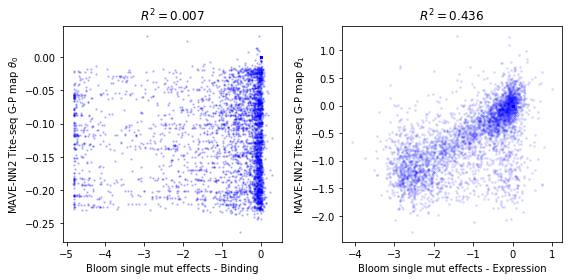

In [41]:
fig, axs = plt.subplots(1,2, figsize=(8,4))
Rsq_0 = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_0_wt_df.fillna(0).values.ravel())[0,1]**2
ax = axs[0]
ax.scatter(bloom_bind_df.values.ravel(), theta_0_wt_df.fillna(0).values.ravel(),s=2,alpha=0.2,color='blue')
bloom_bind_df
lims = [-5,1]
#plt.plot(lims,lims,'--')
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'$R^2 = {Rsq_0:.3f}$')
ax.set_ylabel('MAVE-NN2 Tite-seq G-P map $\\theta_0$')

Rsq_1 = np.corrcoef(bloom_exp_df.fillna(0).values.ravel(), theta_1_wt_df.fillna(0).values.ravel())[0,1]**2
ax = axs[1]
#ax.scatter(logo_bloomd.df.values, theta_1_df.values,s=2.5,alpha=0.25,color='blue')
ax.scatter(bloom_exp_df.values.ravel(),theta_1_wt_df.fillna(0).values.ravel(),s=3,alpha=0.1,color='blue')

#bloom_exp_df
# bloom_bind_df

lims = [-5,1]
#ax.plot(lims,lims,'--')
ax.set_xlabel('Bloom single mut effects - Expression')
ax.set_title(f'$R^2 = {Rsq_1:.3f}$')
ax.set_ylabel('MAVE-NN2 Tite-seq G-P map $\\theta_1$')

fig.tight_layout()

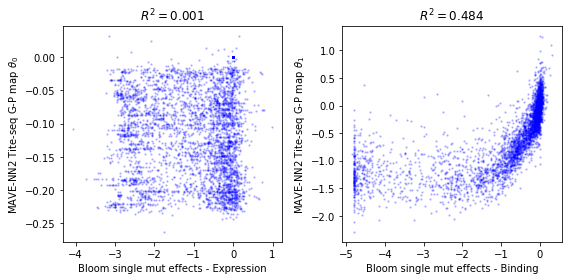

In [42]:
fig, axs = plt.subplots(1,2, figsize=(8,4))
Rsq_0 = np.corrcoef(bloom_exp_df.fillna(0).values.ravel(), theta_0_wt_df.fillna(0).values.ravel())[0,1]**2
ax = axs[0]
ax.scatter(bloom_exp_df.values.ravel(), theta_0_wt_df.fillna(0).values.ravel(),s=2,alpha=0.2,color='blue')
bloom_bind_df
lims = [-5,1]
#plt.plot(lims,lims,'--')
ax.set_xlabel('Bloom single mut effects - Expression')
ax.set_title(f'$R^2 = {Rsq_0:.3f}$')
ax.set_ylabel('MAVE-NN2 Tite-seq G-P map $\\theta_0$')

Rsq_1 = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_1_wt_df.fillna(0).values.ravel())[0,1]**2
ax = axs[1]
#ax.scatter(logo_bloomd.df.values, theta_1_df.values,s=2.5,alpha=0.25,color='blue')
ax.scatter(bloom_bind_df.values.ravel(),theta_1_wt_df.fillna(0).values.ravel(),s=2,alpha=0.2,color='blue')

#bloom_exp_df
# bloom_bind_df

# lims = [-5,1]
# ax.plot(lims,lims,'--',color='black')
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'$R^2 = {Rsq_1:.3f}$')
ax.set_ylabel('MAVE-NN2 Tite-seq G-P map $\\theta_1$')

fig.tight_layout()